<a href="https://colab.research.google.com/github/Sedighe-Raeisi/MNIST_with_Graph_Classification/blob/main/FINAL_Graph_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch_geometric
!pip install torch_sparse
!pip install torch_scatter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 467 kB 4.8 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=d08e2cabe1fb42773721ae5252820412f40fd7c68b60ae5a1aabb41e45041e31
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 3.7 MB/s 
  Created wheel for torch-sparse: filename=torch_sparse-0.6.15-cp37-cp37m-linux_x86_64.whl size=1742305 sha256=189e212850bbc1b40bd30da52d6d83436e6a79ab47308f7f65803dcf6cad7e63
  Stored in directory: /root/.cache/pip/wheels/15/68/4d/1414be5c2c622bad35364e13213180797717b6d4b8923936dc
Successfully built torch-sparse
Looking in indexes: https://pypi.org/simple, https://us-

In [2]:
import pandas as pd
print(q)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import torch

In [5]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [6]:
import torch_geometric



In [10]:
import networkx as nx

In [7]:
from keras.datasets import mnist

In [8]:
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

11501568/11490434 [==============================] - 12s 1us/step


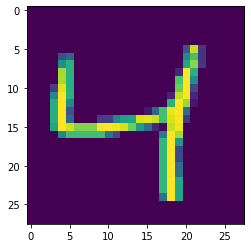

In [9]:
plt.imshow(train_images[2])
img=train_images[2]

#Method_1 Using our defined function for IMG_2_GRRAPH

In [20]:
g=nx.Graph()
k=0
a=[]
n=[]
pos=dict()
nodecolor=dict()
for i in range(28):
  for j in range(28):
    if img[i,j]>1 :
      c='darkorange'
    else:
      c='skyblue'
    g.add_node(k,value=img[i,j],pos=(j,28-i),nodecolor=c)
    pos[k]=(j,28-i)
    nodecolor[k]=c
    a+=[c]
    n+=[k]
    
    k+=1

In [21]:

for i in range(0,28):
  for j in range(0,28):
    if i-1>0 and j-1>0 :
      kf=i*28+j
      kn=(i-1)*28+(j-1)
      g.add_edge(kn,kf)
    if i-1>0  :
      kf=i*28+j
      kn=(i-1)*28+(j)
      g.add_edge(kn,kf)
      
    if i-1>0 and j+1<28 :
      kf=i*28+j
      kn=(i-1)*28+(j+1)
      g.add_edge(kn,kf)
      
    if j-1>0  :
      kf=i*28+j
      kn=(i)*28+(j-1)
      g.add_edge(kn,kf)
      
    if j+1<28:
      kf=i*28+j
      kn=(i)*28+(j+1)
      g.add_edge(kn,kf)
      
    if i+1<28 and j-1>0:
      kf=i*28+j
      kn=(i+1)*28+(j-1)
      g.add_edge(kn,kf)
      
    if i+1<28:
      kf=i*28+j
      kn=(i+1)*28+(j)
      g.add_edge(kn,kf)
      
    if i+1<28 and j+1<28:
      kf=i*28+j
      kn=(i+1)*28+(j+1)
      g.add_edge(kn,kf)
      



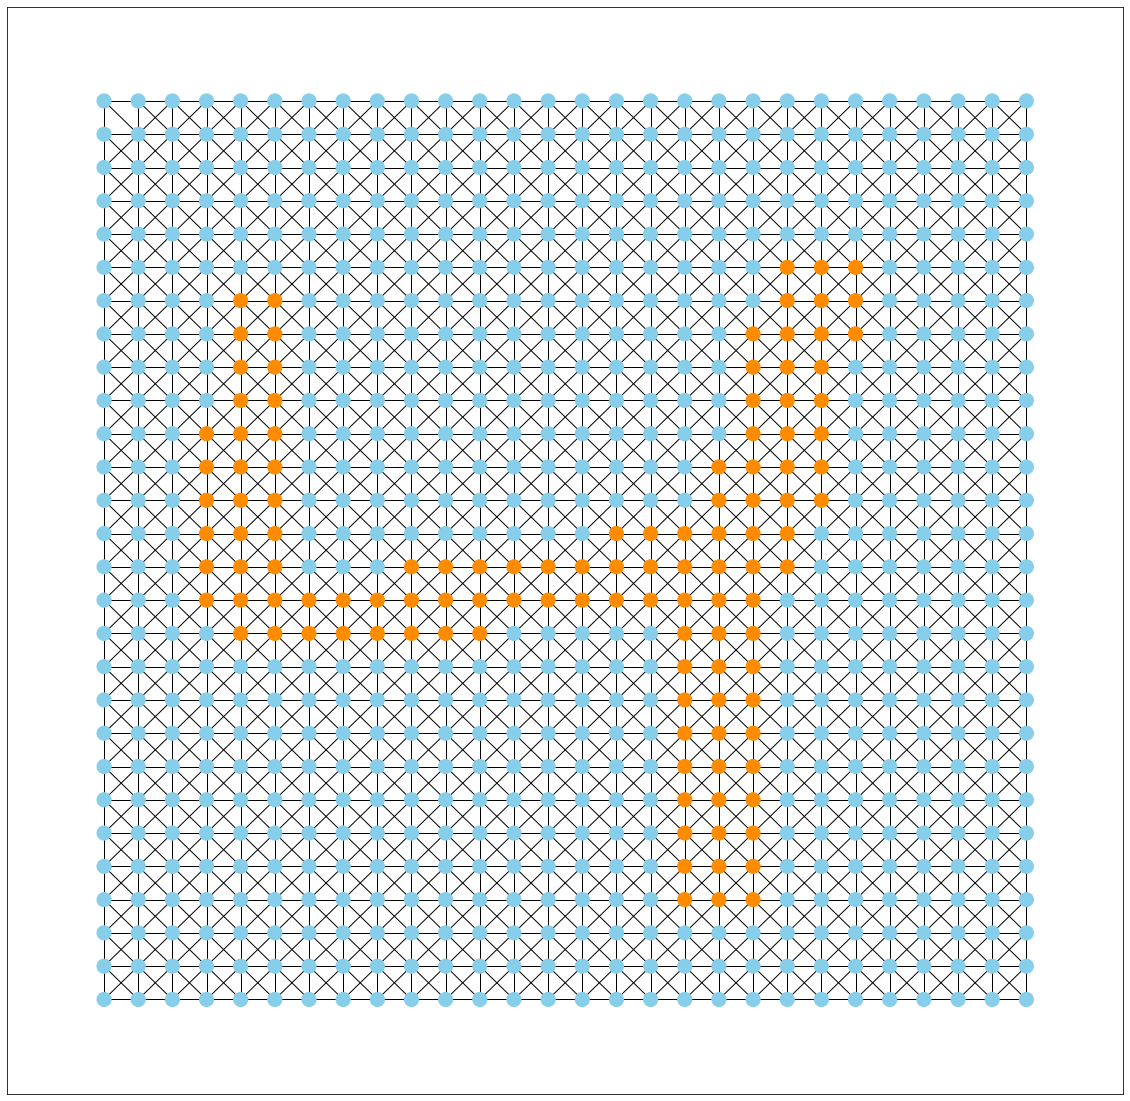

In [13]:
b=20
plt.figure(figsize=(b,b))
nx.draw_networkx(g,pos=nx.get_node_attributes(g,'pos'),with_labels=False,node_color=a,node_size=200,width=1,style='-',edge_color='black')

##preparing the data

In [14]:
from torch_geometric.data import Data
from torch_geometric.utils.convert import from_networkx

In [15]:
def MY_IMG_2_GRAPH(img):
  
  k=0
  a=[]
  nodes=[]
  src_nodes=[]
  dst_nodes=[]
  attr=[]
  #defining nodes:
  for i in range(28):
    for j in range(28):
      if img[i,j]>50 :
        c='pink'
      else:
        c='green'
      
      a+=[c]
      nodes+=[k]
      attr+=[[img[i,j]/255.]]
      k+=1

    #defining edges
    
  for i in range(0,28):
    for j in range(0,28):
      if i-1>0 and j-1>0 :
        kf=i*28+j
        kn=(i-1)*28+(j-1)
       
        src_nodes+=[kf]
        dst_nodes+=[kn]

      if i-1>0  :
        kf=i*28+j
        kn=(i-1)*28+(j)
        
        src_nodes+=[kf]
        dst_nodes+=[kn]
        
      if i-1>0 and j+1<28 :
        kf=i*28+j
        kn=(i-1)*28+(j+1)
      
        src_nodes+=[kf]
        dst_nodes+=[kn]
        
      if j-1>0  :
        kf=i*28+j
        kn=(i)*28+(j-1)
        # g.add_edge(kn,kf)
        src_nodes+=[kf]
        dst_nodes+=[kn]
        
      if j+1<28:
        kf=i*28+j
        kn=(i)*28+(j+1)
        
        src_nodes+=[kf]
        dst_nodes+=[kn]
        
      if i+1<28 and j-1>0:
        kf=i*28+j
        kn=(i+1)*28+(j-1)
      
        src_nodes+=[kf]
        dst_nodes+=[kn]
        
      if i+1<28:
        kf=i*28+j
        kn=(i+1)*28+(j)
       
        src_nodes+=[kf]
        dst_nodes+=[kn]
        
      if i+1<28 and j+1<28:
        kf=i*28+j
        kn=(i+1)*28+(j+1)
       
        src_nodes+=[kf]
        dst_nodes+=[kn]
        
        #self loop
      if i+1<28 and j+1<28:
        kf=i*28+j
        kn=(i)*28+(j)
       
        src_nodes+=[kf]
        dst_nodes+=[kn]

 
    return [nodes, attr,[src_nodes,dst_nodes]]


In [16]:
num_img=50000

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_img, test_img, train_y, test_y=train_test_split(train_images, train_labels, train_size=num_img, stratify=train_labels,shuffle=True)

###Train Loader

In [29]:
data_list=[]

for j in range(num_img):
  image=train_img[j]
  dg=MY_IMG_2_GRAPH(image)
   
  X=torch.tensor(dg[1], dtype=torch.float).cuda()
  edge_index = torch.tensor(dg[2], dtype=torch.long).cuda()
  y=torch.tensor(train_y[j]).int().cuda()
  data=Data(x=X, edge_index=edge_index,y=y)
  data.to(device)
  data_list.append(data)



In [30]:
batch_size=10

In [31]:
from torch_geometric.loader import DataLoader

loader = DataLoader(data_list, batch_size=batch_size,shuffle=True)


###Test Loader

In [33]:
data_list=[]

for j in range(60000-num_img):
  image=test_img[j]
  dg=MY_IMG_2_GRAPH(image)
   
  X=torch.tensor(dg[1], dtype=torch.float).cuda()
  edge_index = torch.tensor(dg[2], dtype=torch.long).cuda()
  y=torch.tensor(test_y[j]).int().cuda()
  data=Data(x=X, edge_index=edge_index,y=y)
  data.to(device)
  data_list.append(data)



In [34]:
test_loader = DataLoader(data_list, batch_size=batch_size,shuffle=True)

##Model

In [35]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

In [36]:
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        
        self.conv1 = GCNConv(-1, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin1 = Linear(hidden_channels*784, 512)
        self.lin2 = Linear(512, 10)
        
        

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        elu=torch.nn.ELU()
        x = elu(x)
        x = self.conv2(x, edge_index)
        x = elu(x)
        x = x.view(batch_size, -1)
        x = self.lin1(x)
        x = x.relu()
        x = self.lin2(x)
        
        
        return x

In [37]:
model = GCN(hidden_channels=32)

In [38]:
model.to(device)

GCN(
  (conv1): GCNConv(-1, 32)
  (conv2): GCNConv(32, 32)
  (lin1): Linear(in_features=25088, out_features=512, bias=True)
  (lin2): Linear(in_features=512, out_features=10, bias=True)
)

In [39]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [40]:
from tensorflow.keras import metrics


In [43]:
acc_list=[]
loss_list=[]
test_lossList=[]
test_accList=[]
for epoch in range(1, 13):
    #---------TRAIN------------
    train_pred_y=[]
    train_true_y=[]
    model.train()
    for data in loader:  # Iterate in batches over the training dataset.
      out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
      loss = criterion(out, F.one_hot(data.y.long(),num_classes=10).float())  # Compute the loss.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      optimizer.zero_grad()
      train_pred_y+=[np.argmax(out.cpu().detach().numpy(), axis=1)]
      train_true_y+=[data.y.cpu().numpy()]
      #____________EVALUATION________________

    metric=metrics.Accuracy()
    metric.update_state(train_pred_y,train_true_y)
    acc=metric.result().numpy()
    acc_list+=[acc]
    loss_list+=[loss.cpu().detach().numpy()]

    #---------TEST-----------
    model.eval()
    test_pred_y=[]
    test_true_y=[]
    for data in test_loader:  # Iterate in batches over the test dataset.
      out = model(data.x, data.edge_index, data.batch)  # Perform prediction.


      test_pred_y+=[np.argmax(out.cpu().detach().numpy(), axis=1)]
      test_true_y+=[data.y.cpu().numpy()]

    metric=metrics.Accuracy()
    metric.update_state(test_pred_y,test_true_y)
    test_acc=metric.result().numpy()
    test_accList+=[test_acc]
    
    print(f'epoch= {epoch}, acc= {acc} ,loss={loss.cpu().detach().numpy()}, test_acc={test_acc}')
    print('---------------------------------')


epoch= 1, acc= 0.9127799868583679 ,loss=0.008322558365762234, test_acc=0.9312000274658203
---------------------------------
epoch= 2, acc= 0.9452400207519531 ,loss=0.07881643623113632, test_acc=0.9451000094413757
---------------------------------
epoch= 3, acc= 0.9560400247573853 ,loss=0.4271917939186096, test_acc=0.9560999870300293
---------------------------------
epoch= 4, acc= 0.9659600257873535 ,loss=0.08589106798171997, test_acc=0.958299994468689
---------------------------------
epoch= 5, acc= 0.972540020942688 ,loss=0.0007492050062865019, test_acc=0.9567000269889832
---------------------------------
epoch= 6, acc= 0.9768199920654297 ,loss=0.0007271181093528867, test_acc=0.9556000232696533
---------------------------------
epoch= 7, acc= 0.9808599948883057 ,loss=0.0074706957675516605, test_acc=0.9607999920845032
---------------------------------
epoch= 8, acc= 0.9825999736785889 ,loss=0.00280562206171453, test_acc=0.9609000086784363
---------------------------------
epoch= 9, ac

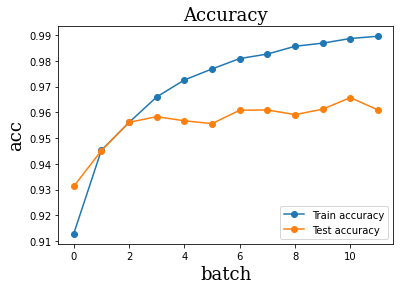

In [44]:
font_dict={'family':'serif','size':18}
plt.plot(acc_list,'o-',label='Train accuracy');
plt.plot(test_accList,'o-',label='Test accuracy');

plt.xlabel('batch',fontdict=font_dict)
plt.ylabel('acc', fontdict=font_dict)
plt.title('Accuracy', fontdict=font_dict)
plt.legend(loc='lower right');


In [45]:
np.argmax(out.cpu().detach().numpy(), axis=1)

array([3, 1, 6, 2, 4, 7, 7, 8, 9, 1])

In [46]:
data.y.cpu().numpy()

array([3, 1, 6, 2, 4, 7, 7, 8, 9, 1], dtype=int32)

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Save the Model

In [48]:
PATH='/content/drive/MyDrive/MachineLearning/GraphMNIST/MY_model_scripted.pt'

In [49]:
torch.save(model, PATH)

##Load the Model

In [50]:
model_n = torch.load(PATH)
model_n.eval()

GCN(
  (conv1): GCNConv(-1, 32)
  (conv2): GCNConv(32, 32)
  (lin1): Linear(in_features=25088, out_features=512, bias=True)
  (lin2): Linear(in_features=512, out_features=10, bias=True)
)

In [52]:
for data in test_loader:  # Iterate in batches over the test dataset.
      out = model_n(data.x, data.edge_index, data.batch)  # Perform prediction.
      

      test_pred_y+=[np.argmax(out.cpu().detach().numpy(), axis=1)]
      test_true_y+=[data.y.cpu().numpy()]

metric=metrics.Accuracy()
metric.update_state(test_pred_y,test_true_y)
test_acc=metric.result().numpy()
test_acc

0.9609

#Method_2 Using SKlearn

##preparing the data

In [53]:
from sklearn.feature_extraction.image import img_to_graph

In [54]:
from torch_geometric.data import Data
from torch_geometric.utils.convert import from_networkx

In [55]:
graph_numpy=img_to_graph(img,return_as=np.ndarray)
graph=nx.from_numpy_array(graph_numpy)
data=from_networkx(graph)

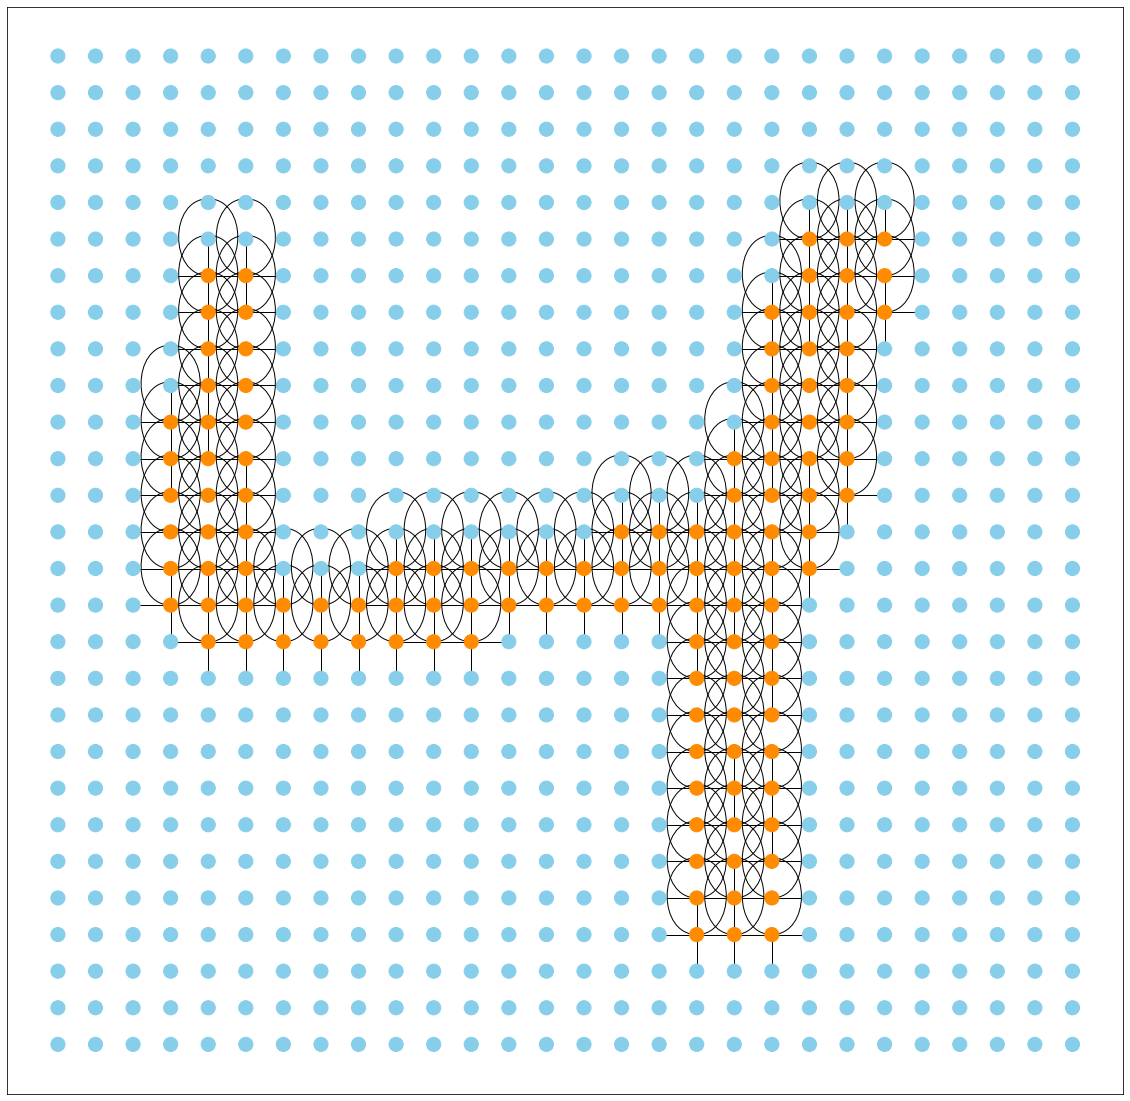

In [56]:

b=20
plt.figure(figsize=(b,b))
nx.draw_networkx(graph,pos=pos,with_labels=False,node_color=a,node_size=200,width=1,style='-',edge_color='black')

In [57]:
def img_2_graph(img):
  graph_numpy=img_to_graph(img,return_as=np.ndarray)
  graph=nx.from_numpy_array(graph_numpy)
  data=from_networkx(graph)
  node_attr=[]
  for i in range(28):
    for j in range(28):
      node_attr+=[[img[i,j]/255.]]
  return [data,node_attr]


In [58]:
a=img_2_graph(img)

In [59]:
num_img=50000

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
train_img, test_img, train_y, test_y=train_test_split(train_images, train_labels, train_size=num_img, stratify=train_labels,shuffle=True)

###Train Loader

In [62]:
data_list=[]

for j in range(num_img):
  image=train_img[j]
  dg=img_2_graph(image)
  data=dg[0]
  
  X=torch.tensor(dg[1], dtype=torch.float).cuda()
  edge_index = data.edge_index.long().cuda()
  weight=data.weight.float().cuda()
  y=torch.tensor(train_y[j]).int().cuda()
  data=Data(x=X, edge_index=edge_index, weight=weight,y=y)
  data.to(device)
  data_list.append(data)



In [63]:
batch_size=10

In [64]:
from torch_geometric.loader import DataLoader

loader = DataLoader(data_list, batch_size=batch_size,shuffle=True)


###Test Loader

In [65]:
data_list=[]

for j in range(60000-num_img):
  image=test_img[j]
  dg=img_2_graph(image)
  data=dg[0]
  X=torch.tensor(dg[1], dtype=torch.float).cuda()
  edge_index = data.edge_index.long().cuda()
  weight=data.weight.float().cuda()
  y=torch.tensor(test_y[j]).int().cuda()
  data=Data(x=X, edge_index=edge_index, weight=weight,y=y)
  data.to(device)
  data_list.append(data)



In [66]:
test_loader = DataLoader(data_list, batch_size=batch_size,shuffle=True)

##Model

In [67]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

In [68]:
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        
        self.conv1 = GCNConv(-1, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin1 = Linear(hidden_channels*784, 512)
        self.lin2 = Linear(512, 10)
        
        

    def forward(self, x, edge_index,edge_weight, batch):
  
        x = self.conv1(x, edge_index,edge_weight)
        elu=torch.nn.ELU()
        x = elu(x)
        x = self.conv2(x, edge_index,edge_weight)
        x = elu(x)
        x = x.view(batch_size, -1)

        x = self.lin1(x)
        x = x.relu()
        x = self.lin2(x)

        
        return x

In [69]:
model = GCN(hidden_channels=32)

In [70]:
model.to(device)

GCN(
  (conv1): GCNConv(-1, 32)
  (conv2): GCNConv(32, 32)
  (lin1): Linear(in_features=25088, out_features=512, bias=True)
  (lin2): Linear(in_features=512, out_features=10, bias=True)
)

In [71]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [72]:
from tensorflow.keras import metrics


In [73]:
acc_list=[]
loss_list=[]
test_lossList=[]
test_accList=[]
for epoch in range(1, 12):
    #---------TRAIN------------
    train_pred_y=[]
    train_true_y=[]
    model.train()
    for data in loader:  # Iterate in batches over the training dataset.
      out = model(data.x, data.edge_index,data.weight, data.batch)  # Perform a single forward pass.
      loss = criterion(out, F.one_hot(data.y.long(),num_classes=10).float())  # Compute the loss.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      optimizer.zero_grad()
      train_pred_y+=[np.argmax(out.cpu().detach().numpy(), axis=1)]
      train_true_y+=[data.y.cpu().numpy()]
      #____________EVALUATION________________

    metric=metrics.Accuracy()
    metric.update_state(train_pred_y,train_true_y)
    acc=metric.result().numpy()
    acc_list+=[acc]
    loss_list+=[loss.cpu().detach().numpy()]

    #---------TEST-----------
    model.eval()
    test_pred_y=[]
    test_true_y=[]
    for data in test_loader:  # Iterate in batches over the test dataset.
      out = model(data.x, data.edge_index,data.weight, data.batch)  # Perform prediction.
     

      test_pred_y+=[np.argmax(out.cpu().detach().numpy(), axis=1)]
      test_true_y+=[data.y.cpu().numpy()]

    metric=metrics.Accuracy()
    metric.update_state(test_pred_y,test_true_y)
    test_acc=metric.result().numpy()
    test_accList+=[test_acc]
    
    print(f'epoch= {epoch}, acc= {acc} ,loss={loss.cpu().detach().numpy()}, test_acc={test_acc}')
    print('---------------------------------')
#     if epoch%10==0 or epoch==1:
#       print('---------------------------------')
#       # print(f'epoch= {epoch}, acc= {acc} ,loss={loss.cpu().detach().numpy()}, test_acc={test_acc}')
#       # break
# print(f'epoch= {epoch}, acc= {acc} ,loss={loss.cpu().detach().numpy()}, test_acc={test_acc}')

epoch= 1, acc= 0.9299399852752686 ,loss=0.03842741996049881, test_acc=0.9487000107765198
---------------------------------
epoch= 2, acc= 0.9627199769020081 ,loss=0.34731054306030273, test_acc=0.9643999934196472
---------------------------------
epoch= 3, acc= 0.9706199765205383 ,loss=0.0003794645017478615, test_acc=0.9672999978065491
---------------------------------
epoch= 4, acc= 0.9761199951171875 ,loss=0.001053227810189128, test_acc=0.9656000137329102
---------------------------------
epoch= 5, acc= 0.978659987449646 ,loss=0.019188769161701202, test_acc=0.9678000211715698
---------------------------------
epoch= 6, acc= 0.9808599948883057 ,loss=0.0012072923127561808, test_acc=0.965399980545044
---------------------------------
epoch= 7, acc= 0.9830999970436096 ,loss=0.0010802382603287697, test_acc=0.9674000144004822
---------------------------------
epoch= 8, acc= 0.9857400059700012 ,loss=2.2111127691459842e-05, test_acc=0.9735999703407288
---------------------------------
epoch= 

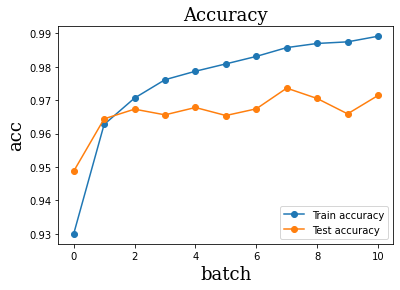

In [74]:
font_dict={'family':'serif','size':18}
plt.plot(acc_list,'o-',label='Train accuracy');
plt.plot(test_accList,'o-',label='Test accuracy');

plt.xlabel('batch',fontdict=font_dict)
plt.ylabel('acc', fontdict=font_dict)
plt.title('Accuracy', fontdict=font_dict)
plt.legend(loc='lower right');


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Save the Model

In [2]:
PATH='/content/drive/MyDrive/MachineLearning/GraphMNIST/model_scripted.pt'

In [3]:
torch.save(model, PATH)

##Load the Model

In [7]:
model_n = torch.load(PATH)
model_n.eval()

In [8]:
for data in test_loader:  # Iterate in batches over the test dataset.
      out = model_n(data.x, data.edge_index,data.weight, data.batch)  # Perform prediction.
      

      test_pred_y+=[np.argmax(out.cpu().detach().numpy(), axis=1)]
      test_true_y+=[data.y.cpu().numpy()]

metric=metrics.Accuracy()
metric.update_state(test_pred_y,test_true_y)
test_acc=metric.result().numpy()
test_acc